In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
# !pip install mpld3
import sympy as sp
from sympy import *

import ipywidgets as widgets

import mpld3
mpld3.enable_notebook()
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
%%html
# <style>
# #notebook-container {
#     width: 100%;
#     background-color: #EEE
# }

# .code_cell {
#    flex-direction: row !important;
# }

# .code_cell .output_wrapper {
#     width: 50%;
#     background-color: #FFF
# }

# .code_cell .input {
#     width: 50%;
#     background-color: #FFF
# }
# </style>

# Problem 33:

Formulate a fixed-point iteration to determine the point of intersection $\left(x^*, y^*\right)$ defined by the two equations
$$
f(x)=2 \cdot \exp (-x), \quad g(x)=\sqrt{1+x}
$$

Show that the assumptions of the Banach fixed-point theorem are fulfilled and thus it holds
$$
x^*=\lim _{k \rightarrow \infty} x_k .
$$

<IPython.core.display.Javascript object>


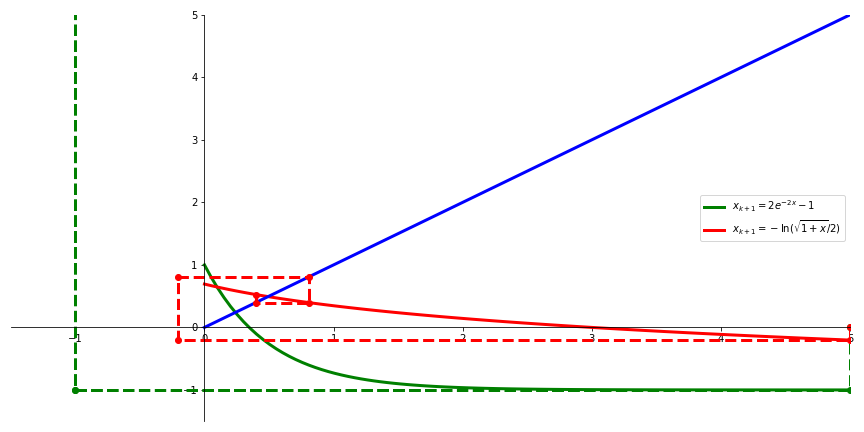

interactive(children=(FloatSlider(value=3.8840000000000003, description='x0', max=5.0, min=2.77, step=0.001), …

In [27]:
#
x = symbols("x")

f1 = 2*exp(-2*x) - 1
f2 = -sp.ln(sqrt(1+x)/2)

z = np.linspace(0, 5, 100)
f1points = [f1.evalf(subs={x: i}) for i in z]
f2points = [f2.evalf(subs={x: i}) for i in z]

# create figure
fig, ax = plt.subplots(1, 1)

# some display settings
ax.set_xlim(-1.5, 5)
ax.set_ylim(-1.5, 5)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# plotting
ax.plot(z, f1points, 'g', lw=2)
ax.plot(z, f2points, 'r', lw=2)
ax.plot(z, z, 'b', lw=12)

# define function to visualise convergence
def conv(f, x0, n_it=7):
    # get x and y coordinates
    xx, yy = [x0], [0]
    for i in range(n_it):
        if i % 2 == 0:
            # change y
            # evaluate function
            y = f.evalf(subs={x: xx[i]})

            xx.append(xx[-1])
            yy.append(y)

        else:
            # change x
            xx.append(yy[-1])
            yy.append(yy[-1])
            
    return [xx, yy]

##################################
# # uncomment to plot convergence
# # get convergence
# x0 = 1.5
# f1_conv = conv2(f1, x0)
# f2_conv = conv2(f2, x0)

# # plot convergence
# ax.plot(f1_conv[0], f1_conv[1], 'go--')
# ax.plot(f2_conv[0], f2_conv[1], 'ro--')
##################################

##################################
# uncomment to interact with convergence
def interact(x0):
        # option 2, remove all lines and collections
    for artist in plt.gca().lines + plt.gca().collections:
        artist.remove()
    
    # plotting
    ax.plot(z, f1points, 'g', label=r"$x_{k+1} = 2e^{-2x} - 1$", lw=3)
    ax.plot(z, f2points, 'r', label="$x_{k+1} = -\ln(\sqrt{1+x}/2)$", lw=3)
    ax.plot(z, z, 'b', lw=3)
    ax.legend()
    
    # plot convergence
    f1_conv = conv(f1, x0)
    f2_conv = conv(f2, x0)

    # plot convergence
    p1 = ax.plot(f1_conv[0], f1_conv[1], 'go--', lw=3)
    p2 = ax.plot(f2_conv[0], f2_conv[1], 'ro--', lw=3)
    
widgets.interact(interact, x0=(2.77, 5, .001))
plt.tight_layout()
##################################


# Problem 32

Find the interpolating polynomial of smallest possible degree through the points $(0, 4), (1, 7), (3, 31)$ and $(2, 14)$. Use the Lagrangian base-polynomials.

Add afterwards the point $(x_3, f_3)=(4, 3)$ to your interpolation polynomial!


## Solution

The given data is

| | | | ||
|:-|:-|:-|:-|:-|
|$x_k$|0|1|2| 3|
|$f_k$|4|7|14| 31 |

$$p(x) = \sum_{k=0}^nf_kl_k^{(n)}(x)$$

$$l_k^{(n)}(x) = \prod_{i=0\\i\ne k}^n \frac{x-x_i}{x_k-x_i}$$

where $n$ is 1 less than the number of points. In this case, $n=4-1=3$.

<div class="alert alert-block alert-success">
The idea of constructing functions from other often simpler functions (so-called basis functions) is pervasive in mathematics. Recall the Fourier series which constructs function using sines and cosines as basis functions with several coefficient multipliers.
</div>

$$l_0^{(3)}(x) = \frac{(x-1)(x-2)(x-3)}{(0-1)(0-2)(0-3)}= \frac{(x-1)(x-2)(x-3)}{-6}$$

$$l_1^{(3)}(x) = \frac{(x-0)(x-2)(x-3)}{(1-0)(1-2)(1-3)}= \frac{x(x-2)(x-3)}{2}$$

$$l_2^{(3)}(x) = \frac{(x-0)(x-1)(x-3)}{(2-0)(2-1)(2-3)}= \frac{x(x-1)(x-3)}{-2}$$

$$l_3^{(3)}(x) = \frac{(x-0)(x-1)(x-2)}{(3-0)(3-1)(3-2)}= \frac{x(x-1)(x-2)}{6}$$

$$\rightarrow p(x) = f_0l_0^{(3)} + f_1l_1^{(3)} + f_2l_2^{(3)} + f_3l_3^{(3)} = 4\frac{(x-1)(x-2)(x-3)}{-6} + 7\frac{x(x-2)(x-3)}{2} + 14\frac{x(x-1)(x-3)}{-2} + 31\frac{x(x-1)(x-2)}{6}$$

Testing the polynomial, $p(0)=4, p(3)=14$

***
Add new point $(x_5, f_5) = (4,3)$.

Adding a new point requires the computing all $l_i$ again.



$$l_0^{(4)}(x) = \frac{(x-1)(x-2)(x-3)(x-4)}{(0-1)(0-2)(0-3)(0-4)}= \frac{(x-1)(x-2)(x-3)(x-4)}{24}$$

$$l_1^{(4)}(x) = \frac{(x-0)(x-2)(x-3)(x-4)}{(1-0)(1-2)(1-3)(1-4)}= \frac{x(x-2)(x-3)(x-4)}{-6}$$

$$l_2^{(4)}(x) = \frac{(x-0)(x-1)(x-3)(x-4)}{(2-0)(2-1)(2-3)(2-4)}= \frac{x(x-1)(x-3)(x-4)}{4}$$

$$l_3^{(4)}(x) = \frac{(x-0)(x-1)(x-2)(x-4)}{(3-0)(3-1)(3-2)(3-4)}= \frac{x(x-1)(x-2)(x-4)}{-6}$$

$$l_3^{(4)}(x) = \frac{(x-0)(x-1)(x-2)(x-3)}{(4-0)(4-1)(4-2)(4-3)}=\frac{x(x-1)(x-2)(x-3)}{24}$$


$\rightarrow p(x) = f_0l_0^{(4)} + f_1l_1^{(4)} + f_2l_2^{(4)} + f_3l_3^{(4)} + f_4l_4^{(4)} = 4\frac{(x-1)(x-2)(x-3)(x-4)}{-24} + 7\frac{x(x-2)(x-3)(x-4)}{-6} +14\frac{x(x-1)(x-3)(x-4)}{4} + 31\frac{x(x-1)(x-2)(x-4)}{4} + 3\frac{x(x-1)(x-2)(x-3)}{24}$



(5, 5)


<IPython.core.display.Javascript object>


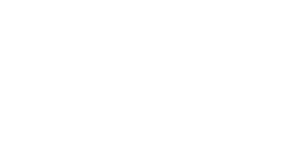

Text(0, 0.5, '$f(x)$')

In [3]:
#

plt.close()
x = Symbol("x")
x_ = np.array([0, 1, 2, 3, 4])
f = np.array([4, 7, 14, 31, 3])
n = len(x_)
L = np.ones([n, len(x_)])
print(np.shape(L))

if (len(x_) != len(f)):
    print(1,'\nERROR!\nPOINTX and POINTY must have the same number of elements\n')
    fx = None
else:
    fx = 0
    for k in range(n):
        li = 1
        for i in range(n):
            if (i != k):
                li = li*(x - x_[i])/(x_[k] - x_[i])
        fx += f[k]*li

        x_interp = np.linspace(0, 4, 50)
        l_interp = lambdify(x, f[k]*li, "numpy")
        plt.plot(x_interp, l_interp(x_interp), lw=1, label=f'f_{k} li_{k}')
        
x_interp = np.linspace(0, 4, 50)
f_interp = lambdify(x, fx, "numpy")

plt.plot(x_interp, f_interp(x_interp),'-r', lw=3)
plt.scatter(x_, f, s=50, facecolors='none', edgecolors='b', zorder=5)
plt.xlabel("$x$")
plt.legend()
plt.ylabel("$f(x)$")

<div class="alert alert-block alert-success">
Something interesting to notice about the plot for the Lagrange interpolation is that at each interpolation point, only one of the basis functions has a value not equal to zero.
</div>

# Problem 33

Calculate the Newton interpolation polynomial for 

|||||
|:-|:-|:-|:-|
|$x_k$|0|1|3|
|$f_k$|3|1|1|

Add afterwards the point $(x_3, f_3)=(4, 5)$ and find the modified interpolating polynomial!

## Solution
$f(x) = c_0 + c_1(x-x_0)+c_2(x-x_0)(x-x_1)+c_3(x-x_0)(x-x_1)(x-x_2)+\cdots$

$f(x_0) = c_0,~ f(x_1)= c_0 + c_1(x-x_0) \rightarrow c_1 = \frac{f(x_1) - f(x_0)}{x_1-x_0}$

$f(x_2)= c_0 + c_1(x_2-x_0)+c_2(x_2-x_0)(x_2-x_1)\rightarrow c_2 = \frac{f(x_2)-c_0-c_1(x_2-x_0)}{(x_2-x_0)(x_2-x_1)}, \cdots=\frac{\frac{f(x_2)-f(x_1)}{x_2-x_1}- \frac{f(x_1)-f(x_0)}{x_1-x_0}}{x_2-x_0}$

| | <div style="width:30px"></div> |<div style="width:100px"></div> | <div style="width:80px"></div>| <div style="width:90px"></div>| <div style="width:90px"></div>|
|:--|:--|:--|:--|:--|:--|
|$x$|$f(x_k)$|||||
|$0$|$\mathbf{3}=c_0$|||||
|$1$|$1$|$\frac{1-3}{1-0}=\mathbf{-2}=c_1$|||
|$3$|$1$|$\frac{1-1}{3-1}=0$|$\frac{0+2}{3-0} = \mathbf{\frac{2}{3}}=c_2$|
|$4$|$5$|$\frac{5-1}{4-3}=4$|$\frac{4-0}{4-1} = \frac{4}{3}$|$\frac{\frac{4}{3}-\frac{2}{3}}{4-0} = \mathbf{\frac{1}{6}}=c_3$|

Polyomial for $\begin{pmatrix}
x_k = (0,1,3)\\
f_k = (3,1,1)
\end{pmatrix} \rightarrow p(x)= 3-2(x-0)+\frac{2}{3}(x-0)(x-1)=3-2x+\frac{2}{3}x(x-1)$ 

Polyomial for $\begin{pmatrix}
x_k = (0,1,3,4)\\
f_k = (3,1,1,5)
\end{pmatrix}$

$$\rightarrow p(x)= 3-2(x-0)+\frac{2}{3}(x-0)(x-1)+\frac{1}{6}(x-0)(x-1)(x-3)=3-2x+\frac{2}{3}x(x-1)+\frac{1}{6}(x)(x-1)(x-3)$$

points:  [[0, 3], [1, 1], [3, 1], [4, 5]]
coeffs:  [ 3.         -2.          0.66666667  0.16666667]


<IPython.core.display.Javascript object>


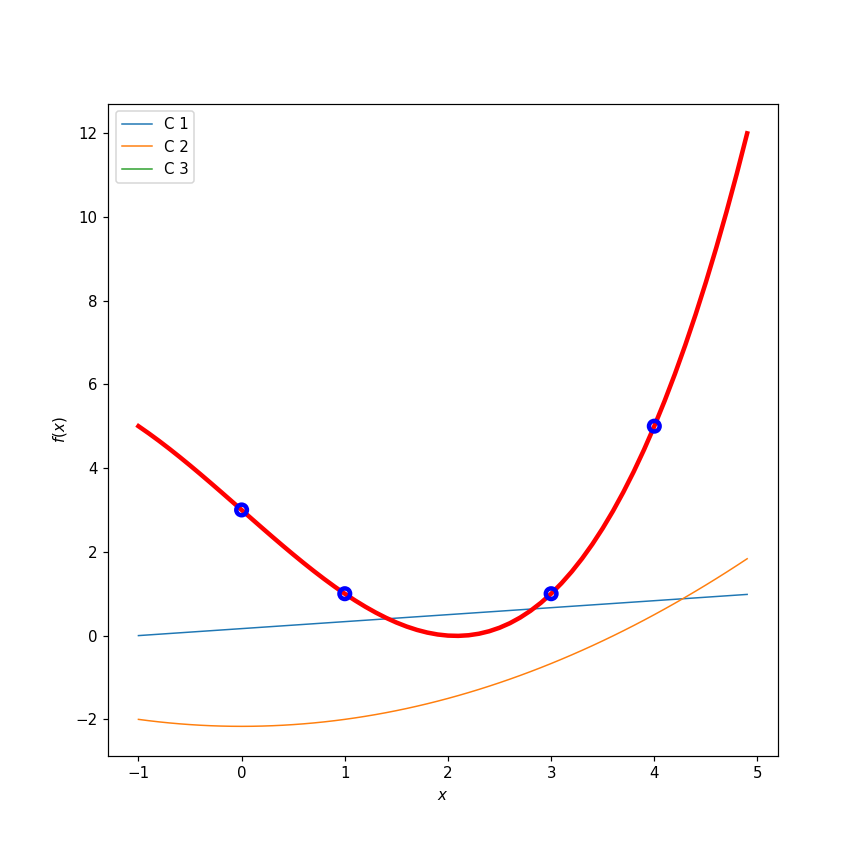

In [4]:

plt.close()
plt.rcParams["figure.figsize"] = (8,8)

def divided_diff(entry):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(entry)
    tab = np.zeros([n, n+1])
    
    x = []
    # get first column
    for i, e in enumerate(entry):
        tab[i, 0:2] = e[0:2]
        if len(e) > 2:
            if 'df' in e:
                tab[i, 2] = e[3]
                
            if 'd2f' in e:
                tab[i, 4] = e[5]
                
    # sort table
    tab = tab[tab[:, 0].argsort()]
    
    for j in range(2, n+1):
        for i in range(j-1, n):
            # check if entry is point or constraint
            if tab[i][j] == 0.0:
                tab[i][j] = (tab[i][j-1] - tab[i-1][j-1]) / (tab[i, 0]-tab[i-j+1, 0])
            
    return tab

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
        
        plt.plot(x, p, lw=1, label=f'C {k}')
        
    return p

#
points = [[0, 3], [1, 1], [3, 1], [4,5]]
print("points: ", points)

# get the divided difference coef
tab = divided_diff(points)

# get coefficients as diagonal of the table
coeff = np.diag(tab, 1)
print("coeffs: ", coeff)

# get interpolation points
x = tab[:, 0]

# evaluate on new data points
x_new = np.arange(min(x)-1, max(x)+1, .1)
f_new = newton_poly(coeff, x, x_new)

plt.scatter(x, tab[:, 1], s=50, facecolors='none', edgecolors='b', zorder=5, lw=3)
plt.plot(x_new, f_new, 'r', lw=3)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

# Problem 34

(a) Rostock averaged $6.5^\circ C$ in March, $11.1^\circ C$ in April, $20.1^\circ C$ in June, and $22.0^\circ C$ in July. Approximate the temperature for May.

(b) A prismatic body of length $L=3$, width and height are equal to 1, is made of a composite material with smoothly changing density $\rho = \rho(x), x\in ~[0, L]$. From measurements we know that $\rho(0)=3, \rho(1)=\rho(3)=1$.

Calculate the total mass of the body, using polynomial interpolation of $\rho$!

## Solution

(a) 
The given data is

| | March| April| June | July |
|:-|:-|:-|:-|:-|
|$x_k$|3|4|6| 7|
|$T_k$|6.5|11.1|20.1| 22.0 |

The problem is to estimate $T(2)$.

***
(b) $m = \iiint\rho(x) \mathrm{d}x \mathrm{d}y \mathrm{d}z \rightarrow m = \frac{1}{2}\int_0^3\rho(x) \mathrm{d}x, ~x\in[0,3]$

|$x$|0|1|3|
|:--|:--|:--|:--|
|$\rho$|3|1|1|

| | |<div style="width:70px"></div> | <div style="width:70px"></div>|
|:--|:--|:--|:--|
|$x$|$\rho$|||
|$0$|$3$|||
|$1$|$1$|$\frac{1-3}{1-0}=-2$||
|$3$|$1$|$\frac{1-1}{3-1}=0$|$\frac{0+2}{3-0} = \frac{2}{3}$|

$\rightarrow \rho(x) = 3 - 2(x-0)+\frac{2}{3}(x-0)(x-1) = \frac{2}{3}x^2-\frac{8}{3}+3$

$m = \frac{1}{2}\int_0^3(\frac{2}{3}x^2-\frac{8}{3}+3)\mathrm{d}x$

$=\frac{1}{2}(\frac{2}{3}\frac{x^3}{3} - \frac{8}{6}x^2+3x \Big \rvert_0^3 = \frac{1}{2}(6-12+9) = \frac{3}{2}$

# Problem 35

Estimate the error of the interpolation from Problem 34 for $x\in[2, 6]$. Assume that the true $f$ has the form 

$$f: [0, 12] \rightarrow \mathbb{R}, ~ f(x) = \alpha + \beta \sin({x \over 6} \pi + \gamma)$$

and choose $\beta = 8$ as rough approximation.

## Solution

To calculate the error estimate, we use

$$ |f(\tilde x) - p(\tilde x)| \le {|w(\tilde x)| \over (n+1)!} \max_{\epsilon \in [a, b]}\vert f^{(n+1)}(\epsilon)\vert$$

where

$$w(\tilde x) = \prod_{j=0}^n (\tilde x-x_j)$$

Using 

$$f(x) = \alpha + \beta \sin({x \over 6} \pi + \gamma)$$

and $n = 3$, we get

$$\max_{\epsilon \in [3, 6]} |f^{(4)}| \le \beta \left({\pi \over 6}\right)^4 \approx 0.6 ~ \beta = 8$$

and
 $$w(\tilde x) = \prod_{j=0}^n (\tilde x-x_j) = (5-3)(5-4)(5-6)(5-7) = 4$$
 
 $$ \rightarrow |f(\tilde x) - p(\tilde x)| \le {4 \over (3+1)!}\cdot 0.6 = 0.1$$
 
 